In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

d:\sorf\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### 生成模拟数据，进行测试

In [2]:
x = np.array(np.arange(100) ,dtype=np.float32)
y = np.array(np.arange(100) ,dtype=np.float32)#此时X和Y其实是相等的，后面加入随机值，尽可能真实模拟实际情况
y +=(np.random.random_sample(100) * 20)# *20指的是，上波动10
y -=20 #下降20，，，y = x+b  -->  y = x - 10
print(y[:20])#查看前20列

[-13.986268  -10.734733   -8.073329  -15.448169   -4.551571    1.7185707
  -7.4722376   4.7964897   2.9364853   6.293375    2.162447    1.4684086
  -1.9640236   9.662052   13.29224     4.9750347  12.714321    5.6254883
   8.343788   11.69239  ]


### 设置权重

In [3]:
#创建变量  
#tf.random_normal([1])返回一个符合正太分布的随机数  
W=tf.Variable(tf.random_normal([1],name='weight'))  # 权重，由于线性拟合是 一维且线性，在此权值设置一个即可
b=tf.Variable(tf.random_normal([1],name='bias'))    # 偏执参数是必须的，作为整体调整的参数

# W = tf.Variable(0.0, name="weight")
# b = tf.Variable(0.0, name="bias")

### 添加占位符

In [4]:
X = tf.placeholder(tf.float32,[None,1])    #指的是输入
Y = tf.placeholder(tf.float32,[None,1])    #指的是输出

### 构造损失函数

In [5]:
loss = tf.reduce_sum(tf.pow(tf.multiply(W,X) + b - Y,2.0))

### 添加优化器

In [6]:
optimizer = tf.train.AdamOptimizer(1).minimize(loss)
# optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

### 开始训练

In [7]:
init = tf.global_variables_initializer()
save_step_loss = {"step":[],"loss":[]}# 保存step和loss用于可视化操作
line_k = 0
line_b = 0
with tf.Session() as sess:
    sess.run(init)
    for step in range(200):   #一千次迭代
        sess.run(optimizer,feed_dict={X:x.reshape(-1,1),Y:y.reshape(-1,1)})
        print("step:",step,
              "loss: ",sess.run(loss,feed_dict={X:x.reshape(-1,1),Y:y.reshape(-1,1)}),
              "W:",sess.run(W),
              "b:",sess.run(b))
        save_step_loss["step"].append(step)
        save_step_loss["loss"].append(sess.run(loss,feed_dict={X:x.reshape(-1,1),Y:y.reshape(-1,1)}))
    line_k = sess.run(W)
    line_b = sess.run(b)

step: 0 loss:  923758.75 W: [-0.85981715] b: [2.8122025]
step: 1 loss:  165715.42 W: [0.10227048] b: [3.7722352]
step: 2 loss:  18670.035 W: [0.9657481] b: [4.6269903]
step: 3 loss:  254037.94 W: [1.639363] b: [5.2783113]
step: 4 loss:  546535.94 W: [2.048647] b: [5.6500006]
step: 5 loss:  675056.6 W: [2.191824] b: [5.7469306]
step: 6 loss:  608760.75 W: [2.1210024] b: [5.6278133]
step: 7 loss:  423895.66 W: [1.8980321] b: [5.357139]
step: 8 loss:  217593.08 W: [1.5773941] b: [4.98951]
step: 9 loss:  66117.5 W: [1.206378] b: [4.5713124]
step: 10 loss:  7953.576 W: [0.82849526] b: [4.144858]
step: 11 loss:  39343.027 W: [0.48460564] b: [3.749936]
step: 12 loss:  122130.38 W: [0.21017382] b: [3.4214554]
step: 13 loss:  204499.31 W: [0.03002214] b: [3.1844199]
step: 14 loss:  245923.22 W: [-0.04554225] b: [3.0498857]
step: 15 loss:  232294.5 W: [-0.02037898] b: [3.0148442]
step: 16 loss:  175393.95 W: [0.09106004] b: [3.0654]
step: 17 loss:  101955.64 W: [0.26775444] b: [3.1806712]
step: 

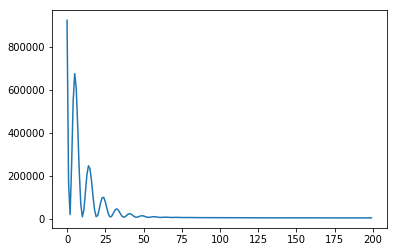

In [8]:
plt.plot(save_step_loss["step"],save_step_loss["loss"])
plt.show()

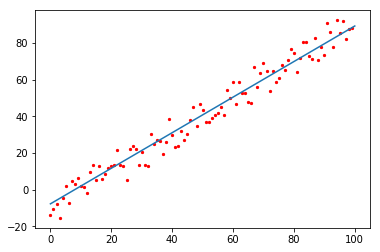

In [9]:
plt.scatter(x,y,5,c="r")
plt.plot([0,100],[0 * line_k + line_b , 100 * line_k + line_b])